# Understanding our data

In [1]:
import pandas as pd
import numpy as np

In [56]:
sales = pd.read_csv('sales.csv')

In [3]:
sales.head()

,Unnamed: 0,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,425390,366,4,2013-04-18,517,1,0,0,0,4422
1,291687,394,6,2015-04-11,694,1,0,0,0,8297
2,411278,807,4,2013-08-29,970,1,1,0,0,9729
3,664714,802,2,2013-05-28,473,1,1,0,0,6513
4,540835,726,4,2013-10-10,1068,1,1,0,0,10882


In [57]:
sales.drop(columns=('Unnamed: 0'),axis=1, inplace = True)

In [58]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640840 entries, 0 to 640839
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   store_ID             640840 non-null  int64 
 1   day_of_week          640840 non-null  int64 
 2   date                 640840 non-null  object
 3   nb_customers_on_day  640840 non-null  int64 
 4   open                 640840 non-null  int64 
 5   promotion            640840 non-null  int64 
 6   state_holiday        640840 non-null  object
 7   school_holiday       640840 non-null  int64 
 8   sales                640840 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 44.0+ MB


In [59]:
# We saw that we need to transform our features to their correct type

sales['open'] = sales['open'].astype(int)
sales['promotion'] = sales['promotion'].astype(int)
sales['school_holiday'] = sales['school_holiday'].astype(int)

sales['store_ID'] = sales['store_ID'].astype(object)
sales['day_of_week'] = sales['day_of_week'].astype(object)

In [60]:
# We need to correct our date feature to a numerical value in order to be able to process it

from datetime import datetime

def date_to_ordinal(date):
    return datetime.strptime(date, '%Y-%m-%d').toordinal()

sales['date'] = sales['date'].apply(date_to_ordinal)

In [26]:
# We saw that we dont't need to create a dumy variable, but just validade if it is or not a holiday

categorical_features = ['state_holiday']

for col in categorical_features:
    dummies = pd.get_dummies(sales[col], prefix=col)
    sales = pd.concat([sales, dummies], axis=1)
    sales.drop(col, axis=1, inplace=True)
    
sales.head()

,sales_ID,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,school_holiday,sales,state_holiday_0,state_holiday_a,state_holiday_b,state_holiday_c
0,425390,366,4,2013-04-18,517,True,False,False,4422,1,0,0,0
1,291687,394,6,2015-04-11,694,True,False,False,8297,1,0,0,0
2,411278,807,4,2013-08-29,970,True,True,False,9729,1,0,0,0
3,664714,802,2,2013-05-28,473,True,True,False,6513,1,0,0,0
4,540835,726,4,2013-10-10,1068,True,True,False,10882,1,0,0,0


In [36]:
sales.groupby(['state_holiday_0','state_holiday_a','state_holiday_b','state_holiday_c']).mean()

date  \
state_holiday_0 state_holiday_a state_holiday_b state_holiday_c                  
0               0               0               1                735394.418826   
                                1               0                735324.950166   
                1               0               0                735332.468229   
1               0               0               0                735333.927555   

                                                                 nb_customers_on_day  \
state_holiday_0 state_holiday_a state_holiday_b state_holiday_c                        
0               0               0               1                          28.859756   
                                1               0                          43.046274   
                1               0               0                          42.273945   
1               0               0               0                         652.178403   

                                                                     open  \
state_holiday_0 state_holiday_a state_holiday_b state_holiday_c             
0               0               0               1                0.018293   
                                1               0                0.024205   
                1               0               0                0.033406   
1               0               0               0                0.855556   

                                                                 promotion  \
state_holiday_0 state_holiday_a state_holiday_b state_holiday_c              
0               0               0               1                 0.000000   
                                1               0                 0.500000   
                1               0               0                 0.367310   
1               0               0               0                 0.382826   

                                                                 school_holiday  \
state_holiday_0 state_holiday_a state_holiday_b state_holiday_c                   
0               0               0               1                      1.000000   
                                1               0                      0.925486   
                1               0               0                      0.259539   
1               0               0               0                      0.168258   

                                                                       sales  
state_holiday_0 state_holiday_a state_holiday_b state_holiday_c               
0               0               0               1                 178.606707  
                                1               0                 252.936877  
                1               0               0                 282.368167  
1               0               0               0                5952.206403

In [62]:
# StateHoliday indicates a state holiday. Normally all stores, with few exceptions,
# are closed on state holidays. Note that all schools are closed on public holidays and weekends.
# a = public holiday, b = Easter holiday, c = Christmas, 0 = None

# As we saw that it doesn't matter much what tipe orf holiday it is, we will creat a boolean column just to state
# if it is or not a holiday

sales['state_holiday'] = sales['state_holiday'].replace('a',1).replace('b',1).replace('c',1)
sales['state_holiday'] = sales['state_holiday'].astype(int)

In [63]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640840 entries, 0 to 640839
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   store_ID             640840 non-null  object
 1   day_of_week          640840 non-null  object
 2   date                 640840 non-null  int64 
 3   nb_customers_on_day  640840 non-null  int64 
 4   open                 640840 non-null  int32 
 5   promotion            640840 non-null  int32 
 6   state_holiday        640840 non-null  int32 
 7   school_holiday       640840 non-null  int32 
 8   sales                640840 non-null  int64 
dtypes: int32(4), int64(3), object(2)
memory usage: 34.2+ MB


<ipython-input-65-fdf2b9598ee6>:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(sales.corr(), dtype=np.bool))


Text(0.5, 1.0, 'Triangle Correlation Heatmap')

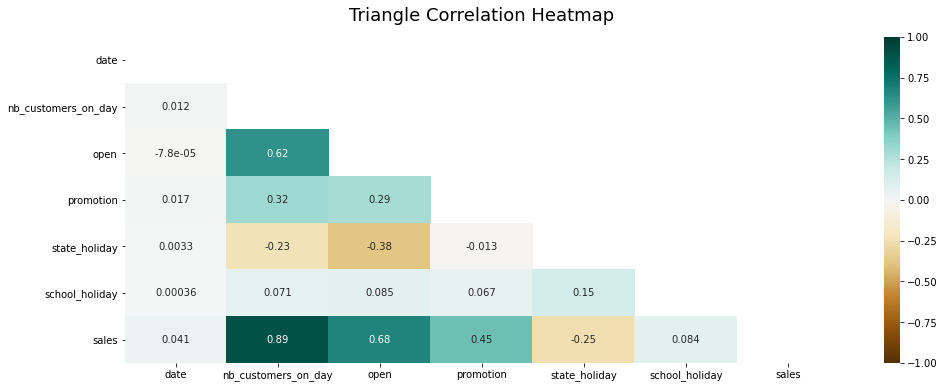

In [65]:
# %matplotlib inline
# import matplotlib.pyplot as plt
# import seaborn as sns

plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(sales.corr(), dtype=np.bool))
heatmap = sns.heatmap(sales.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)

Text(0.5, 1.0, 'Features Correlating with Type')

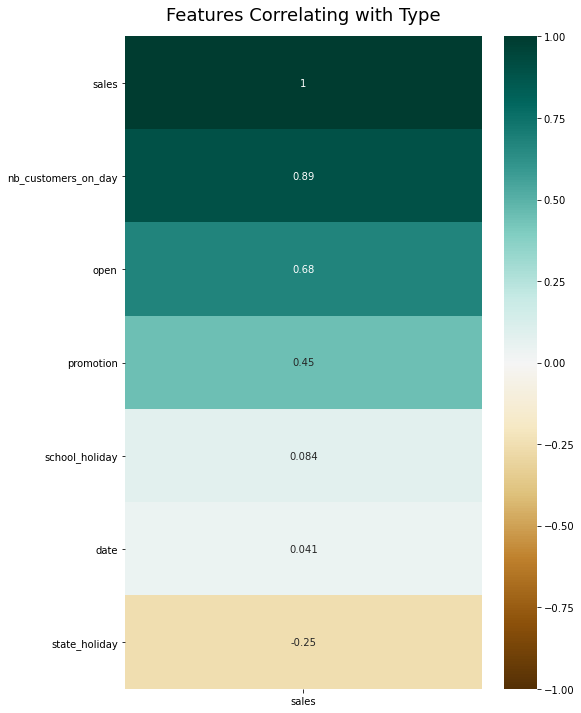

In [66]:
# Just checking the correlation with our target

plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(sales.corr()[['sales']].sort_values(by='sales', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Type', fontdict={'fontsize':18}, pad=16)

In [67]:
# Instantiating a LinearRegression Model
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# Creating two arrays for the feature and target
y = sales['sales']
X = sales.drop('sales',  axis=1)

# Splitting the datasets into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.8)

# Fitting our model
model.fit(X_train, y_train)
    
# Running Evaluation Metrics
from sklearn.metrics import mean_squared_error, r2_score

predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
print('The r2 is: ', r2)
print('The rmse is: ', rmse)

The r2 is:  0.8542022716290083
The rmse is:  1461.056050474989


In [69]:
# We saw that school_holiday doesn't have a strong correlation to any of our features and target,
# So we will see if we get a better score without this column
sales_featsel = sales.drop(columns='school_holiday',axis=1)

In [70]:
# Instantiating a LinearRegression Model
model = LinearRegression()

# Creating two arrays for the feature and target
y = sales_featsel['sales']
X = sales_featsel.drop('sales',  axis=1)

# Splitting the datasets into training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.8)

# Fitting our model
model.fit(X_train, y_train)
    
# Running Evaluation Metrics

predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
print('The r2 is: ', r2)
print('The rmse is: ', rmse)

The r2 is:  0.8531761896154778
The rmse is:  1479.7857703508503


In [ ]:
# So... even that school_holiday doesn't have a strong correlation, droping it makes our R^2 be lower
# Beacause of that we decided to keep it

In [ ]:
# Also, before doing all of this we've run our model without any chances in our dataset (in other computer).
# The values obtained was:

# The r2 is:  0.8541070570089223
# The rmse is:  1470.1437494420563

# Conclusion so far: we needed to do some changes

In [64]:
sales.describe()

,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
count,640840.000000,640840.000000,640840.000000,640840.000000,640840.00000,640840.000000,640840.000000
mean,735334.086967,633.398577,0.830185,0.381718,0.03071,0.178472,5777.469011
std,274.469985,464.094416,0.375470,0.485808,0.17253,0.382910,3851.338083
min,734869.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,735097.000000,405.000000,1.000000,0.000000,0.00000,0.000000,3731.000000
50%,735325.000000,609.000000,1.000000,0.000000,0.00000,0.000000,5746.000000
75%,735579.000000,838.000000,1.000000,1.000000,0.00000,0.000000,7860.000000
max,735810.000000,5458.000000,1.000000,1.000000,1.00000,1.000000,41551.000000


In [ ]:
# Now... looking to our nb_customers_on_day and sales features we believe that we need to standardize them
# From this point on we will be trully evaluating our model and spliting it into three datasets:
# train, test and validation set